# Programación Media

## Por José Roberto Herrera

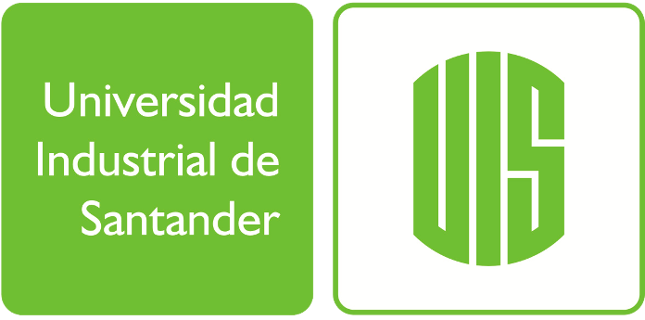

# Profundización en cadenas de caracteres y métodos especiales

## Sobrecarga de operadores y métodos especiales



Python permite definir métodos especiales para operadores y funciones que realizan operaciones comunes. Estos métodos se llaman de una manera especial en Python para reconocer la asociación.



Para cadenas de caracteres por ejemplo, se pueden utilizar los operadores **+** y ** * **. Los operadores relacionales (==, !=, <, <=, > y >=) para comparar dos cadenas de caracteres y el operador índice [ ] para accesar un carácter.

Estos operadores son METODOS definidos en la clase ** str ** y nosotros podemos crearlos también. Definir métodos para operadores es llamado *operator overloading* (sobrecarga de operadores). Esto permite al programador utilizar operadores predeterminados para métodos definidos por el usuario.

En esta lista están todos los operadores con su respectivo método:

|Operador/Función|Método
|----|----
|+| \__add__(self, other)
|*| \__mul__(self, other)
|-| \__sub__(self, other)
|/| \__div__(self, other)
|%| \__mod__(self, other)
|<| \__lt__(self, other)
|<=|\__le__(self, other)
|==|\__cmp\__(self, other), \__eq\__(self, other) en python3
|!=|\__ne__(self, other)
|>|\__gt__(self, other)
|>=|\__ge__(self, other)
|[index]|\__getitem__(self, index)
|in|\__contains__(self, value)
|len|\__len__(self)
|str|\__str__(self)


<div class="alert alert-info"><strong>Importante:</strong> Estos módulos no son privados, empiezan y terminan con dos guiones bajos, los privados empiezan solamente. </div>

Por ejemplo: Si queremos utilizar el operador + como método necesitamos definirlo con el nombre \__add\__. Mire que estos métodos son similares al inicializador de las clases \__init\__.

In [8]:
help(str)

Help on class str in module __builtin__:

class str(basestring)
 |  str(object='') -> string
 |  
 |  Return a nice string representation of the object.
 |  If the argument is a string, the return value is the same object.
 |  
 |  Method resolution order:
 |      str
 |      basestring
 |      object
 |  
 |  Methods defined here:
 |  
 |  __add__(...)
 |      x.__add__(y) <==> x+y
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __format__(...)
 |      S.__format__(format_spec) -> string
 |      
 |      Return a formatted version of S as described by format_spec.
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __getnewargs__(...)
 |  
 |  __getslice__(...)
 |      x.__getslice__(i, j) <==> x[i:j]
 |      
 |      Use of negative indices is not supported.
 |  


In [12]:
s1 = "Perro"
s2 = "Gato"
print "El primer caracter en s1 es", s1[0] 
print "s1 + s2 is", s1 + s2  
print "s1 < s2?", s1 < s2 

El primer caracter en s1 es P
s1 + s2 is PerroGato
s1 < s2? False


In [10]:
s1 = "Perro"
s2 = "Gato"
print "El primer caracter en s1 es", s1.__getitem__(0)
print "s1 + s2 is", s1.__add__(s2)
print "s1 < s2?", s1.__lt__(s2)

El primer caracter en s1 es P
s1 + s2 is PerroGato
s1 < s2? False


In [13]:
s1 = "Perro"
print "E está en s1?", 'e' in s1 
print "E está en s1?", s1.__contains__('e')

E está en s1? True
E está en s1? True


In [14]:
s1 = "Perro"
print "La longitud de s1 es", len(s1)
print "La longitud de s1 es", s1.__len__()


La longitud de s1 es 5
La longitud de s1 es 5


## Diseño de la clase *Rational*

Un número racional tiene un numerador y un denominador de la forma: $\frac{numerador}{denominador}$, así $\frac{2}{3}$, $\frac{2}{17}$ son números racionales.

Python provee tipos de datos para enteros, flotantes pero no para números racionales. En este ejercicio veremos como diseñar una clase racional para dichos números.

Comenzamos diseñando lo que para nosotros sería una clase que represente los números racionales y que sea mínimamente apropiada, podrían faltar algunas cosas.

En el diseño de la clase racional se establece que se puede crear un número racional con un numerador y denominador especificado o crear uno predeterminado con el numerador como 0 y el denominador como 1. Se puede sumar, restar, multiplicar, dividir y comparar números racionales. También se puede convertir dichos números a enteros, a flotantes o a cadenas de caracteres. 

Comenzamos sintetizando todo lo anterior en un diagrama  UML para la clase **Rational** sería el siguiente:

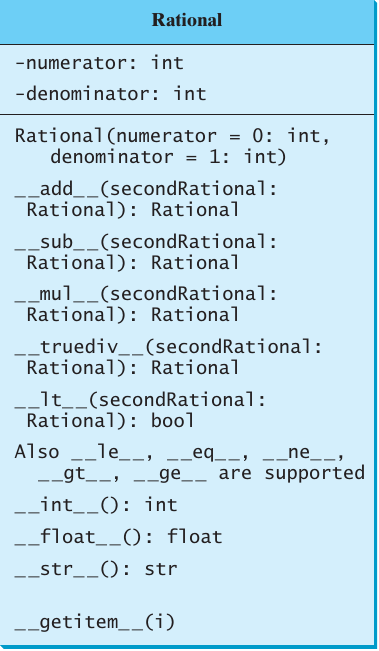

Existen equivalentes para los números racionales, por ejemplo, $\frac{1}{3}$ = $\frac{2}{6}$ = $\frac{3}{9}$ = $\frac{4}{12}$, etc.

Es conveniente representar todos estos números racionales con $\frac{1}{3}$. Computacionalmente podemos simplemente analizar que $\frac{1}{3}$ no tiene un divisor común excepto 1. Así que $\frac{1}{3}$ es el más bajo de los términos.

Para reducir un número racional a su término más bajo podemos utilizar un código antiguo como es el de gran común divisor (GCD) de dos números entero.

Como la clase Rational tiene 90 líneas de código vamos a analizarla paso a paso.

Cuidado, *gcd* no hace parte de la clase Rational pero sí del Módulo "Rational.py"

In [3]:
def gcd(n, d):
    n1 = abs(n)
    n2 = abs(d)
    gcd = 1
    
    k = 1
    while k <= n1 and k <= n2:
        if n1 % k == 0 and n2 % k == 0:
            gcd = k
        k += 1
    return gcd

Definimos la clase *Rational*.

In [ ]:
class Rational:

Obtener el gran común divisor, asignar el numerador teniendo en cuenta el signo y asignar el denominador. Se dividen por el gran común divisor para obtener el término más bajo de todos los posibles.

In [ ]:
    def __init__(self, numerator = 0, denominator = 1):
        divisor = gcd(numerator, denominator)
#        self.__numerator = (1 if denominator > 0 else -1) \
#            * int(numerator / divisor)
        self.__numerator = (denominator > 0 + (denominator < 0) * -1) \
            * int(numerator / divisor)
        self.__denominator = int(abs(denominator) / divisor)

Regresa el numerador o el denominador utilizando una operación de indice. $\frac{a}{b}$ donde a= 0, b=1

In [ ]:
    def __getitem__(self, index):
        if index == 0:
            return self.__numerator
        if index == 1:
            return self.__denominator
        else:
            raise Exception("Non existent index")

Como tratar errores en python: https://docs.python.org/2.7/tutorial/errors.html

$$\frac{a}{b}+\frac{c}{d}=\frac{ad+bc}{bd}$$

In [ ]:
    def __add__(self, secondRational):
        n = self.__numerator * secondRational[1] + \
            self.__denominator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)

$$\frac{a}{b}-\frac{c}{d}=\frac{ad-bc}{bd}$$

In [ ]:
    def __sub__(self, secondRational):
        n = self.__numerator * secondRational[1] - \
            self.__denominator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)

$$\frac{a}{b}\times \frac{c}{d}=\frac{ac}{bd}$$

In [ ]:
    def __mul__(self, secondRational):
        n = self.__numerator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)

$$\frac{a}{b}\div \frac{c}{d}=\frac{ad}{bc}$$

In [ ]:
    def __div__(self, secondRational):
        n = self.__numerator * secondRational[1]
        d = self.__denominator * secondRational[0]
        return Rational(n, d)

Devuelve Float e int

In [ ]:
    def __float__(self):
        return float(self.__numerator) / self.__denominator
    
    def __int__(self):
        return int(self.__float__())

Devuelve cadena de caracteres:

In [ ]:
    def __str__(self):
        if self.__denominator == 1:
            return str(self.__numerator)
        else:
            return str(self.__numerator) + "/" + str(self.__denominator)

Compara dos números por medio de una sencilla resta.

In [ ]:
    def __cmp__(self, secondRational):
        temp = self.__sub__(secondRational)
        if temp[0] > 0:
            return 1
        elif temp[0] < 0:
            return -1
        else:
            return 0

Establece <, <=, >, >=.

In [ ]:
    def __lt__(self, secondRational):
        return self.__cmp__(secondRational) < 0
    
    def __le__(self, secondRational):
        return self.__cmp__(secondRational) <= 0
    
    def __gt__(self, secondRational):
        return self.__cmp__(secondRational) > 0
    
    def __ge__(self, secondRational):
        return self.__cmp__(secondRational) >= 0

In [4]:
class Rational:
    def __init__(self, numerator = 0, denominator = 1):
        divisor = gcd(numerator, denominator)
        self.__numerator = (1 if denominator > 0 else -1) \
            * int(numerator / divisor)
#        self.__numerator = (denominator > 0 + (denominator < 0) * -1) \
#            * int(numerator / divisor)
        self.__denominator = int(abs(denominator) / divisor)
        
    def __add__(self, secondRational):
        n = self.__numerator * secondRational[1] + \
            self.__denominator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)
    
    def __sub__(self, secondRational):
        n = self.__numerator * secondRational[1] - \
            self.__denominator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)
    
    def __mul__(self, secondRational):
        n = self.__numerator * secondRational[0]
        d = self.__denominator * secondRational[1]
        return Rational(n, d)

    def __div__(self, secondRational):
        n = self.__numerator * secondRational[1]
        d = self.__denominator * secondRational[0]
        return Rational(n, d)
    
    def __float__(self):
        return float(self.__numerator) / self.__denominator
    
    def __int__(self):
        return int(self.__float__())
    
    def __str__(self):
        if self.__denominator == 1:
            return str(self.__numerator)
        else:
            return str(self.__numerator) + "/" + str(self.__denominator)
    
    def __lt__(self, secondRational):
        return self.__comp__(secondRational) < 0
    
    def __le__(self, secondRational):
        return self.__comp__(secondRational) <= 0
    
    def __gt__(self, secondRational):
        return self.__comp__(secondRational) > 0
    
    def __ge__(self, secondRational):
        return self.__comp__(secondRational) >= 0
    
    def __comp__(self, secondRational):
        temp = self.__sub__(secondRational)
        if temp[0] > 0:
            return 1
        elif temp[0] < 0:
            return -1
        else:
            return 0
    
    def __getitem__(self, index):
        if index == 0:
            return self.__numerator
        if index == 1:
            return self.__denominator
        else:
            raise Exception("Non existent index")

In [5]:
#from Rational import *
#import Rational as rat
#from Rational import Rational, gcd
#from Rational import Rational as rat, gcd 

r1 = Rational(4, 2)
r2 = Rational(1, 3) 
r3 = Rational(3)
print r1, "+", r2, "*", r3, "=", r1 + r2 * r3
print r1, "-", r2, "=", r1 - r2 
print r1, "*", r2, "=", r1 * r2 
print r1, "/", r2, "=", r1 / r2 
print r1, ">", r2, "is", r1 > r2 
print r1, ">=", r2, "is", r1 >= r2 
print r1, "<", r2, "is", r1 < r2 
print r1, "<=", r2, "is", r1 <= r2
print r1, "==", r2, "is", r1 == r2 
print r1, "!=", r2, "is", r1 != r2 
print "int(r2) is", int(r2)
print "float(r2) is", float(r2) 
print "r2[0] is", r2[0] 
print "r2[1] is", r2[1]

2 + 1/3 * 3 = 3
2 - 1/3 = 5/3
2 * 1/3 = 2/3
2 / 1/3 = 6
2 > 1/3 is True
2 >= 1/3 is True
2 < 1/3 is False
2 <= 1/3 is False
2 == 1/3 is False
2 != 1/3 is True
int(r2) is 0
float(r2) is 0.333333333333
r2[0] is 1
r2[1] is 3


In [6]:
r1

<__main__.Rational instance at 0x7f186047add0>

# Ejercicio
Aunque Python no tenga la clase Rationl, si tiene la clase Complex. 

Diseñe e implemente su propia clase *Complex.py*, en python está nombrada como *complex*.

Su clase debe tener los métodos \__add\__, \__sub\__, \__mul\__, \__div\__, \__abs\__, \__str\__ (a+bi). También se debe tener métodos getRealPart() y getImaginaryPart().

En otro archivo debe importar la clase y comparar con los resultados de la clase definida ya en Python.